In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras import Model,Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.losses import MeanSquaredLogarithmicError
from tensorflow import keras

In [26]:
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [27]:
data.shape

(4998, 141)

In [28]:
np.unique(data[140])

array([0., 1.])

In [29]:
x=data.drop(140,axis=1)
x.shape

(4998, 140)

In [30]:
y=data[140]
y.shape

(4998,)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [32]:
train_index=y_train[y_train==1].index
train_data=x_train.loc[train_index]
#isko kehthe hai novlety detetcion hum log uso bas woh code dere train karne jahaan anaomaly na ho

In [33]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))
#baaki assignments mai jo /255 kiya wahi kiya hai idhar

In [34]:
x_train_scaled=min_max_scaler.fit_transform(train_data.copy())
x_test_scaled=min_max_scaler.transform(x_test.copy())
#This line takes your test data (x_test) and applies the same scaling that was learned from the 
#training data. It doesn't learn any new minimum or maximum values here; 
#it just uses the ones from the training data. This is called transforming.

In [35]:
#code size::::The bottleneck is the layer in the autoencoder where the input data is compressed into fewer dimensions. 
#For example, if you set code_size to 8, the model will compress the input data down to 8 values.
class AutoEncoder(Model):
    def __init__(self, output_units, code_size=8):#constructor hai ye jisme self call diya hai output units jo end mai honge na and code size is the z space ka 
        super().__init__()#call the cosnt of parent class because it ensures that any initialization defined in the Model class (the parent class) 
        #is also executed when you create an instance of your AutoEncoder class.
        
        # Define the encoder
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(code_size, activation='relu')
        ])
        
        # Define the decoder
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])
        
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
        #ye sab help(Model) krke milega mostly

In [36]:
print(x_train_scaled.shape)

model=AutoEncoder(output_units=x_train_scaled.shape[1])
#yahan pai shape wala kyu pass kiya cause woh hold karta the no of features that we need thamt means all columsn except the last one ofcourse

(2335, 140)


In [37]:
model.compile(loss='msle',metrics=['mse'],optimizer='adam')

In [38]:
history=model.fit(x_train_scaled,x_train_scaled,batch_size=512,validation_data=(x_test_scaled,x_test_scaled),epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0118 - mse: 0.0265 - val_loss: 0.0138 - val_mse: 0.0321
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mse: 0.0257 - val_loss: 0.0137 - val_mse: 0.0318
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mse: 0.0251 - val_loss: 0.0133 - val_mse: 0.0311
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mse: 0.0227 - val_loss: 0.0131 - val_mse: 0.0304
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - mse: 0.0195 - val_loss: 0.0133 - val_mse: 0.0309
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mse: 0.0166 - val_loss: 0.0123 - val_mse: 0.0286
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mse: 0.0142 - val_loss: 0.0117 - val_mse: 0.0271
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - mse: 0.0122 - val_loss: 0.0110 - val_mse: 0.0256
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - mse: 0.0110 -

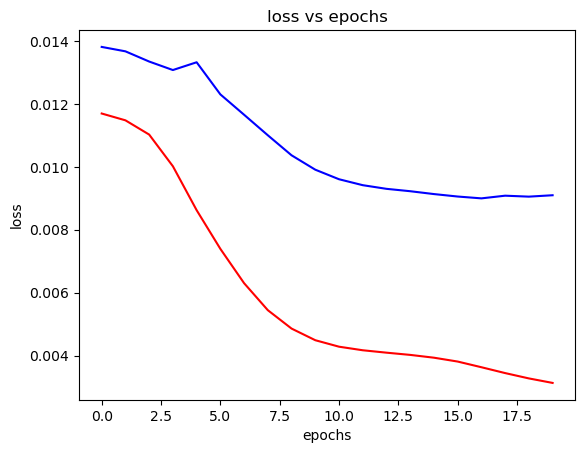

In [39]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
#plt.legend()
plt.show()

In [40]:
recons=model.predict(x_train_scaled)#pehle x train data pai prediction karo
recons_error=keras.losses.msle(recons,x_train_scaled)#phir dekho losses kitne hai prediction mai and actual Y ka role nai hai idhar
threshold=np.mean(recons_error.numpy())+np.std(recons_error.numpy())#yaha threshold calc karo 
threshold

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.0067504079077686215

In [41]:
preds=model.predict(x_test_scaled)#yaha pai apn technically wapis x hi predict karre cause isme Y ka kuch role nai 
errors=keras.losses.msle(preds,x_test_scaled)#yahan hame Y ko build karre only for the sake of acc calc
anomaly_mas=pd.Series(errors)>threshold
pre=np.where(anomaly_mas,0.0,1.0)#ye pre apna kinda y hai acc mai dalne ko

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
accuracy = accuracy_score(pre, y_test)
accuracy #yahan pai apan ne daal diya pre and y test to get the accuracy

0.957